<a href="https://colab.research.google.com/github/losvaldote/Python_Club_for_Physicist/blob/main/Copia_de_PCP_Sesi%C3%B3n_10%5BE%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
##  II Escuela de Verano en Física Computacional

Autor: [Harold Yesid Laserna Diaz](https://github.com/haroldlaserna).\
Institución: Universidad Distrital Francisco José de Caldas\
Correo: hylasernad@correo.udistrital.edu.co
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

## Modificado por Luis Osvaldo Téllez Tovar


# <center> Simulación de un sistema objeto resorte inmerso en un fluido.

## Outline
1. [Método de Runge-Kutta de cuarto orden](#1.-Funciones)
2. [Parámetros y condiciones](#2.-Series)
3. [Ecuaciones diferenciales del sistema planteado y soluciones](#3.-Errores)
4. [Solución y gráficas](#4-Gráficos)
5. [Formas alternativas](#4-Gráficos)


**<font size="5"> 1.Generando función de método numérico Runge-Kutta de cuarto orden</font>**

Sea la ecuación diferencial:

$$\frac{dU}{dt}=f(U,t)$$

$f(U,t)$ es una función cualquiera y $U$ es un vector columna de dimensión Lx1 denotado de la siguiente forma:

$$U(t)=\begin{pmatrix} x_{1}(t) \\ x_{2}(t)\\ x_{3}(t) \\ \vdots \\ x_{L}(t) \end{pmatrix}$$

donde $L$ es el conjunto de funciones que dan un solución a la ecuación diferencial. 

**<font size="4"> Ejemplo: </font>**

Dada la siguente ecuación diferencial:

$$\frac{dU}{dt}=\begin{pmatrix} cos(t) \\ sen(t) \end{pmatrix}$$

observamos que $L=2$, su condicion inicial es:

$$U(0)= \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

la solución de la ecuación diferencial es:

$$U= \begin{pmatrix} -sen(t) \\ cos(t) \end{pmatrix}$$

**¿Qué sucedería si tenemos una ecuación diferencial la cual no tiene solución analítica o es muy compleja?**

Podemos aprovechar el mundo de los métodos numéricos sin saber su solución analitica por ejemplo el siguente:

Sabemos que el método de Runge-Kutta de cuarto orden está determinado de la siguiente forma:

$$k_1=f(U_n,t_n)$$
$$k_2=f(U_n + \frac{h}{2}k_1, t_n + \frac{h}{2}) $$
$$k_3=f(U_n + \frac{h}{2}k_2, t_n + \frac{h}{2}) $$
$$k_4=f(U_n + hk_3, t_n + h) $$
$$A_n = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

Siendo $A_n$ el algoritmo de evolución en el paso $n$.

Para obtener los valores numéricos $U_{n+1}$ usamos la siguente ecuación:

$$U_{n+1}=U_n+A_nh$$


**¿Con qué analizar el error del metodo al intentar diverger a la solución?**

Tenemos dos opciones, la primera, teniendo en cuenta soluciones analíticas bajo ciertas condiciones del sistema, llamada generalmente "error relativo" denotada de la siguiente manera:

$$e = |\frac{f_{num}-f_{real}}{f_{real}}|$$

Cuando no se tiene una solución analitica de alguna ecuación diferencial, alternativamente podemos analizar el nivel de convergencia del metodo numerico mediante diferentes valores de discretización de la siguiente forma:

$$P = log_{2}(x_{n}^h-x_{2n}^\frac{h}{2})-log_{2}(x_{2n}^\frac{h}{2}-x_{4n}^\frac{h}{4})$$




In [ ]:
import numpy as np

In [ ]:
def Runge_Kutta(f,Un,tn,h):
  
  """
  f: Función dada
  Un: Valor de U en el paso n
  tn: Tiempo en el paso n
  h: Incremento
  """

  k1 = f(Un,tn)
  k2 = f(Un + (h*k1)/2,tn + (h/2))
  k3 = f(Un + (h*k2)/2,tn + (h/2))
  k4 = f(Un + (h*k3),tn + h)

  An = (k1 + 2*k2 + 2*k3 + k4)/6

  return Un + An*h

In [ ]:
def control_p(U1,U2,U4):
    P = []
    for i in range(len(U1)):
        P.append((np.log2((U1[i]-U2[2*i])/(U2[2*i]-U4[4*i]))))
    return P

## 2. parámetros y condiciones

In [ ]:
#parámetros

ρ = 1.0 # Densidad del fluido
Cd = 1.0 # Coeficiente de arrastre
A = 1.0 # Area de la seccion trasversal
m = 1.0 # masa del objeto
v = 1.0 # volumen del objeto inmerso en el fluido
k = 1.0 # constante elastica
g = 9.8 # aceleracion de la gravedad




#condiciones del sistema y del método

t_o = 0.0 # tiempo inicial
t_f = 50.0 # tiempo final
N = 1000 # número de pasos totales

t = np.linspace(t_o, t_f, N)

v_o = 1.0 # velocidad inicial
x_o = -1.0 # posición inicial
U_o = [x_o, v_o]


## 3. Ecuaciones diferenciales del sistema planteado y soluciones

In [ ]:
def sistema_objeto_resorte(U_n, t_n):

  """
	entradas:
	         t_n: Tiempo en el paso n
	         U_n: Arreglo con posicion y velocidad en el tiempo t_n

	salida:  
	         ecuaciones: Arrreglo de ecuaciones diferenciales  
	"""

  global a, b, c
  
  ecuaciones = np.zeros(2)
  ecuaciones[0] = U_n[1]
  ecuaciones[1] = a - b*U_n[0]  - c*abs(U_n[1])*(U_n[1])

  return ecuaciones

In [ ]:

def solucion(f, U_o, t, h, metodo):

  X = np.zeros(len(t))
  V = np.zeros(len(t))

  X[0], V[0] = U_o

  for i in range(len(t)-1):
    U_n = [X[i], V[i]]
    X[i+1] , V[i+1] = metodo(f,U_n,t[i],h)
  
  return X, V


## 4. Solución y gráficas



## 4.1 Sistema objeto-resorte en el fluido sin fuerza de arrastre

solución analitica

In [ ]:
a = ρ*g*v/m - g
b = k/m
c = 0

In [ ]:
def solucion_analitica_1(t,U_o, b,a):

  x = np.zeros(len(t))
  v = np.zeros(len(t))

  for i in range(len(t)):

    x_resorte_objeto = U_o[0]*np.cos(np.sqrt(b)*t[i]) + U_o[1]*np.sqrt(b)*np.sin(np.sqrt(b)*t[i])
    x[i]= ((-a)/np.sqrt(b))*(1 - np.cos(np.sqrt(b)*t[i])) + x_resorte_objeto 

    v_resorte_objeto = -(U_o[0]/np.sqrt(b))*np.sin(np.sqrt(b)*t[i]) + U_o[1]*b*np.cos(np.sqrt(b)*t[i])
    v[i] = ((-a)/b)*(np.sin(np.sqrt(b)*t[i])) + v_resorte_objeto
  return x, v

In [ ]:
x_analitica, v_analitica = solucion_analitica_1(t,U_o, b,a)

Aproximación numérica

In [ ]:
t = np.linspace(t_o, t_f, N)
t_2 = np.linspace(t_o, t_f, 2*N)
t_4 = np.linspace(t_o, t_f, 4*N)

X, V  = solucion(sistema_objeto_resorte, U_o, t,(t_f - t_o)/float(N), Runge_Kutta)
X_2, V_2  = solucion(sistema_objeto_resorte, U_o, t_2,(t_f - t_o)/float(2*N), Runge_Kutta)
X_4, V_4  = solucion(sistema_objeto_resorte, U_o, t_4,(t_f - t_o)/float(4*N), Runge_Kutta)

P = control_p(X,X_2,X_4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log2
  after removing the cwd from sys.path.


Posición

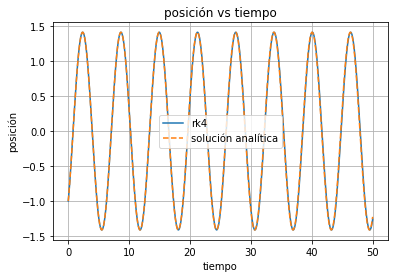

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t,X, label =  "rk4")
plt.plot(t,x_analitica, label = "solución analítica",linestyle = 'dashed' )
plt.ylabel(u"posición")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("posición vs tiempo")
plt.legend()
plt.show()


Error sistemático

In [ ]:
e_x, e_v = [], []
for i in range(len(x_analitica)):
  e_x.append(abs(x_analitica[i]-X[i])/abs(x_analitica[i]))
  e_v.append(abs(v_analitica[i]-V[i])/abs(v_analitica[i]))

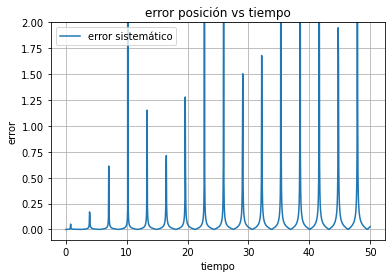

In [ ]:
plt.plot(t,e_x, label =  "error sistemático")
plt.ylabel(u"error")
plt.xlabel(u"tiempo")
plt.ylim(-0.1,2)
plt.grid()
plt.title("error posición vs tiempo")
plt.legend()
plt.show()

# El error es muy grande porque en algunos puntos se divide entre cero.

Rapidez

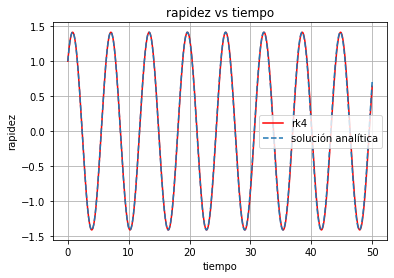

In [ ]:
plt.plot(t ,V, label =  "rk4", color = "r")
plt.plot(t,v_analitica, label = "solución analítica",linestyle = 'dashed' )
plt.ylabel(u"rapidez")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("rapidez vs tiempo")
plt.legend()

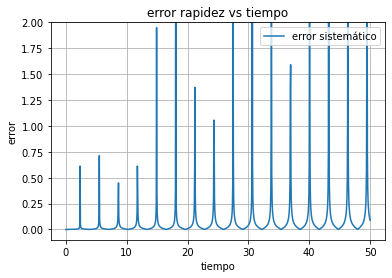

In [ ]:
plt.plot(t,e_v, label =  "error sistemático")
plt.ylabel(u"error")
plt.xlabel(u"tiempo")
plt.ylim(-0.1,2)
plt.grid()
plt.title("error rapidez vs tiempo")
plt.legend()
plt.show()

# El error es muy grande porque en algunos puntos se divide entre cero.

Espacio de fase

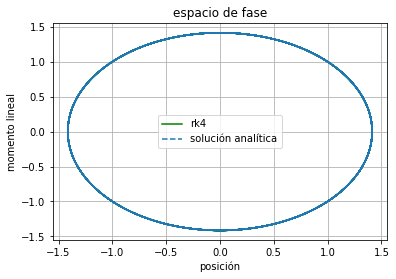

In [ ]:
plt.plot(X ,V, label =  "rk4", color = "g")
plt.plot(x_analitica,v_analitica, label = "solución analítica",linestyle = 'dashed' )
plt.ylabel(u"momento lineal")
plt.xlabel(u"posición")
plt.grid()
plt.title("espacio de fase")
plt.legend()

Divergencia del método

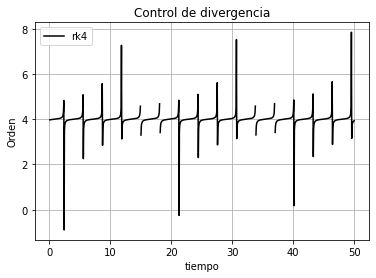

In [ ]:
plt.plot(t ,P, label =  "rk4", color = "k")
plt.ylabel(u"Orden")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("Control de divergencia")
plt.legend()

# El error es muy grande porque en algunos puntos se divide entre cero.

## 4.1 Solo fuerza de arrastre (?)

Solución analítica

In [ ]:
a = 0
b = 0
c = ρ*Cd*A/(2*m)

In [ ]:
def solucion_analitica_2(t,U_o, c):

  x = np.zeros(len(t))
  v = np.zeros(len(t))

  for i in range(len(t)):

      x[i] = U_o[0] + np.sign(U_o[1])*np.log(1  + (c)*abs(U_o[1])*t[i] )/c
      v[i] = U_o[1]/(1 + (c*np.sign(U_o[1])*t[i]))
  return x, v


In [ ]:
x_analitica, v_analitica = solucion_analitica_2(t,U_o, c)

Método numérico

In [ ]:
t = np.linspace(t_o, t_f, N)
t_2 = np.linspace(t_o, t_f, 2*N)
t_4 = np.linspace(t_o, t_f, 4*N)

X, V  = solucion(sistema_objeto_resorte, U_o, t,(t_f - t_o)/float(N), Runge_Kutta)
X_2, V_2  = solucion(sistema_objeto_resorte, U_o, t_2,(t_f - t_o)/float(2*N), Runge_Kutta)
X_4, V_4  = solucion(sistema_objeto_resorte, U_o, t_4,(t_f - t_o)/float(4*N), Runge_Kutta)

P = control_p(X,X_2,X_4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
e_x, e_v = [], []
for i in range(len(x_analitica)):
  e_x.append(abs(x_analitica[i]-X[i])/abs(x_analitica[i]))
  e_v.append(abs(v_analitica[i]-V[i])/abs(v_analitica[i]))

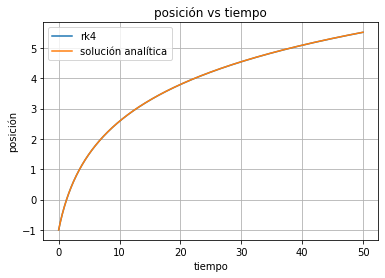

In [ ]:
plt.plot(t,X, label =  "rk4")
plt.plot(t,x_analitica , label =  "solución analítica")
plt.ylabel(u"posición")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("posición vs tiempo")
plt.legend()

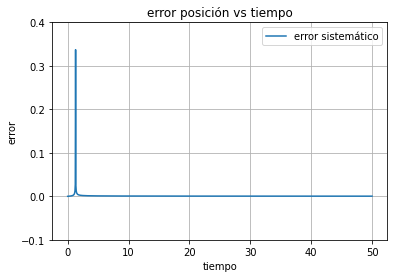

In [ ]:
plt.plot(t,e_x, label =  "error sistemático")
plt.ylabel(u"error")
plt.xlabel(u"tiempo")
plt.ylim(-0.1,0.4)
plt.grid()
plt.title("error posición vs tiempo")
plt.legend()
plt.show()

# El pico es porque pasa por un cero

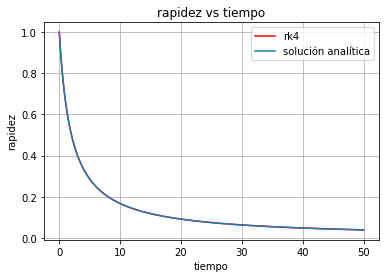

In [ ]:
plt.plot(t ,V, label =  "rk4", color = "r")
plt.plot(t,v_analitica , label =  "solución analítica")
plt.ylabel(u"rapidez")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("rapidez vs tiempo")
plt.legend()

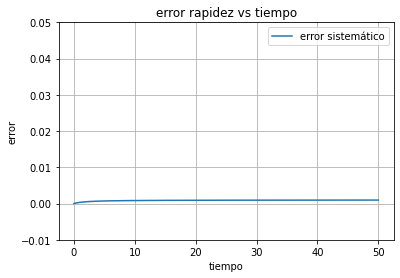

In [ ]:
plt.plot(t,e_v, label =  "error sistemático")
plt.ylabel(u"error")
plt.xlabel(u"tiempo")
plt.ylim(-0.01,0.05)
plt.grid()
plt.title("error rapidez vs tiempo")
plt.legend()
plt.show()

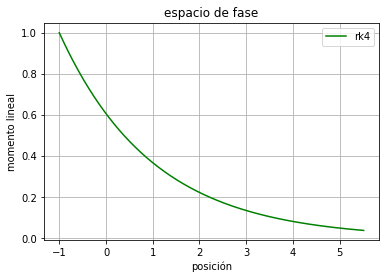

In [ ]:
plt.plot(X ,V, label =  "rk4", color = "g")
plt.ylabel(u"momento lineal")
plt.xlabel(u"posición")
plt.grid()
plt.title("espacio de fase")
plt.legend()

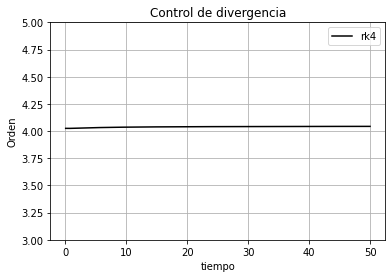

In [ ]:
plt.plot(t ,P, label =  "rk4", color = "k")
plt.ylim(3,5)
plt.ylabel(u"Orden")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("Control de divergencia")
plt.legend()

## 4.1 Sistema objeto-resorte en el fluido con fuerza de arrastre

In [ ]:
a = ρ*g*v/m - g
b = k/m
c = ρ*Cd*A/(2*m)
t = np.linspace(t_o, t_f, N)
t_2 = np.linspace(t_o, t_f, 2*N)
t_4 = np.linspace(t_o, t_f, 4*N)

X, V  = solucion(sistema_objeto_resorte, U_o, t,(t_f - t_o)/float(N), Runge_Kutta)
X_2, V_2  = solucion(sistema_objeto_resorte, U_o, t_2,(t_f - t_o)/float(2*N), Runge_Kutta)
X_4, V_4  = solucion(sistema_objeto_resorte, U_o, t_4,(t_f - t_o)/float(4*N), Runge_Kutta)

P = control_p(X,X_2,X_4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log2
  after removing the cwd from sys.path.


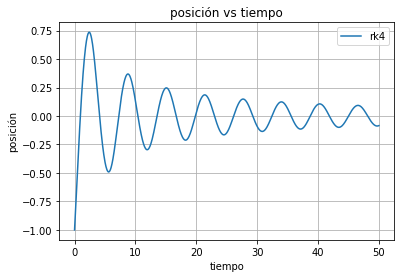

In [ ]:
plt.plot(t,X, label =  "rk4")
plt.ylabel(u"posición")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("posición vs tiempo")
plt.legend()

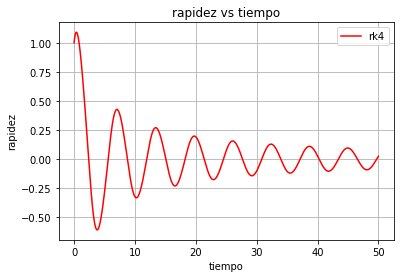

In [ ]:
plt.plot(t ,V, label =  "rk4", color = "r")
plt.ylabel(u"rapidez")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("rapidez vs tiempo")
plt.legend()

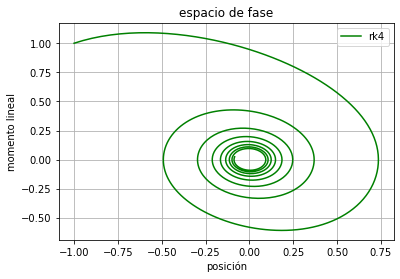

In [ ]:
plt.plot(X ,V, label =  "rk4", color = "g")
plt.ylabel(u"momento lineal")
plt.xlabel(u"posición")
plt.grid()
plt.title("espacio de fase")
plt.legend()

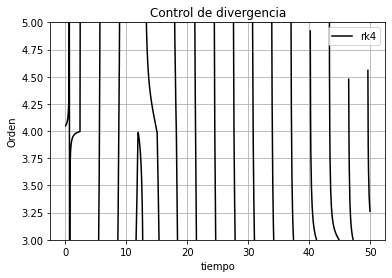

In [ ]:
plt.plot(t ,P, label =  "rk4", color = "k")
plt.ylim(3,5)
plt.ylabel(u"Orden")
plt.xlabel(u"tiempo")
plt.grid()
plt.title("Control de divergencia")
plt.legend()

# El error es muy grande porque en algunos puntos se divide entre cero.

## 5. Formas alternativas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log2
  after removing the cwd from sys.path.


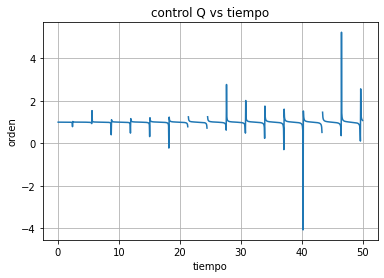

In [ ]:
from scipy.integrate import odeint

a = ρ*g*v/m - g
b = k/m
c = ρ*Cd*A/(2*m)

sol = odeint(sistema_objeto_resorte, U_o, t)
sol2 = odeint(sistema_objeto_resorte, U_o, t_2)
sol4 = odeint(sistema_objeto_resorte, U_o, t_4)

P = control_p(sol[:,0],sol2[:,0],sol4[:,0])
plt.plot(t,P)
plt.title("control Q vs tiempo")
plt.ylabel("orden")
plt.xlabel("tiempo")
plt.grid()

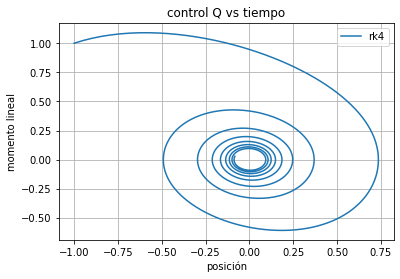

In [ ]:
plt.plot(sol[:,0],sol[:,1],label="rk4")
plt.title("control Q vs tiempo")
plt.ylabel("momento lineal")
plt.xlabel("posición")
plt.legend()
plt.grid()


## 5. Recursos útiles

* Métodos numéricos para integración y ODE [SciPy](https://docs.scipy.org/doc/scipy/reference/integrate.html)
* [Espacio de fase detalladamente](https://www.youtube.com/watch?v=N6wrPD1faVw)
* Butcher & John, C. (2008). Numerical Methods for Ordinary Differential Equations, New York: John Wiley & Sons
## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>